In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from mmd_wrapper import mmd_combine
from mmd_wrapper.utilities import alignment_visualize, pairwise_error
import pandas as pd

from nmacom import NMAcom

2021-10-05 18:54:01.596258: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-05 18:54:01.596302: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


# Read Data

In [2]:
preprocess = lambda df: df.dropna().astype(float).to_numpy()
X1 = preprocess(pd.read_csv('scMNC/efeature_filtered.csv'))
X2 = preprocess(pd.read_csv('scMNC/geneExp_filtered.csv', index_col=0).transpose())

# Run Mapping

In [3]:
nmacom_out = NMAcom().fit_transform([X1, X2])

use random seed: 666
Shape of Raw data
Dataset 0: (1208, 29)
Dataset 1: (1208, 1286)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[100/2000] err:4.7529 alpha:20.4566
epoch:[200/2000] err:0.6368 alpha:2.7408
epoch:[300/2000] err:0.0853 alpha:0.3672
epoch:[400/2000] err:0.0114 alpha:0.0492
epoch:[500/2000] err:0.0189 alpha:0.0812
epoch:[600/2000] err:0.0293 alpha:0.1262
epoch:[700/2000] err:0.0405 alpha:0.1743
epoch:[800/2000] err:0.0520 alpha:0.2241
epoch:[900/2000] err:0.0636 alpha:0.2745
epoch:[1000/2000] err:0.0751 alpha:0.3244
epoch:[1100/2000] err:0.0863 alpha:0.3732
epoch:[1200/2000] err:0.0971 alpha:0.4203
epoch:[1300/2000] err:0.1073 alpha:0.4655
epoch:[1400/2000] err:0.1169 alpha:0.5083
epoch:[1500/2000] err:0.1259 alpha:0.5489
epoch:[1600/2000] err:0.1343 alpha:0.5870
epoch:[1700/2000] err:0.1420 alpha:0.6227
epoch:[1800/2000] err:0.1490 alpha:0.6560
epoch:[1900/2000] err:0.1554 alpha:0.6871
epoch:[2000/2000] err:0

# Compare

In [4]:
# NMAcom
print('NMAcom Pairwise Error: ' + str(pairwise_error(*nmacom_out, normalize_by_feature=True)))
print()

# UnionCom
unioncom_out = mmd_combine(X1, X2, method='unioncom', verbose=0)
print('UnionCom Pairwise Error: ' + str(pairwise_error(*unioncom_out[0], normalize_by_feature=True)))
print()

# ManiNetCluster
maninetcluster_out = mmd_combine(X1, X2,
                                 method='maninetcluster',
                                 alignment='nonlinear manifold aln',
                                 num_dims=2)
print('ManiNetCluster Pairwise Error: ' + str(pairwise_error(*maninetcluster_out[0], normalize_by_feature=True)))

NMAcom Pairwise Error: 73.58633956017007

UnionCom Pairwise Error: 63.023365672677755

ManiNetCluster Pairwise Error: 58.56503329526763


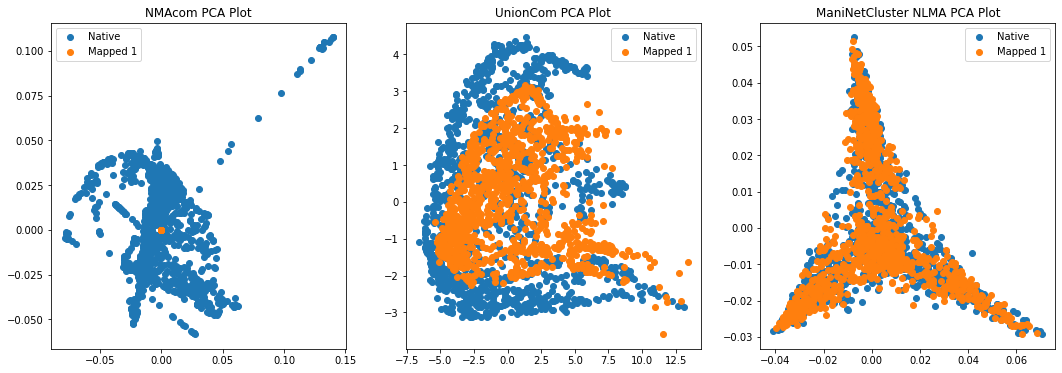

In [5]:
mappings = [nmacom_out, unioncom_out[0], maninetcluster_out[0]]
names = ['NMAcom', 'UnionCom', 'ManiNetCluster NLMA']

plt.subplots(figsize=(6*len(names), 6))
for i, mapping in enumerate(mappings):
    plt.subplot(1, len(names), i+1)
    alignment_visualize(*mapping, alg_name=names[i])